# Color-Based Segmentation - Magic Cube Challenge - HSV

In [99]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

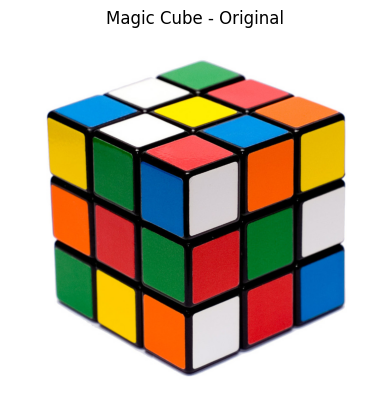

In [100]:
image = cv2.imread('images/magic_cube.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

title = 'Magic Cube'

plt.imshow(image)
plt.title(f'{title} - Original')
plt.axis('off')
plt.show()

## Example 01 - One Color:

In [101]:
min_color = np.array([90, 80, 40], dtype='uint8')
max_color = np.array([120, 255, 255], dtype='uint8')

print(f'Min.: {min_color}', f'Max.: {max_color}')

Min.: [90 80 40] Max.: [120 255 255]


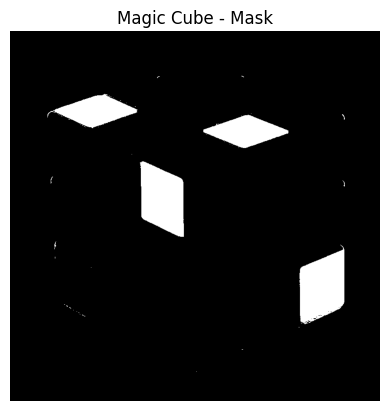

In [102]:
mask_image = cv2.inRange(image_hsv, min_color, max_color)

plt.imshow(mask_image, cmap='gray')
plt.title(f'{title} - Mask')
plt.axis('off')
plt.show()

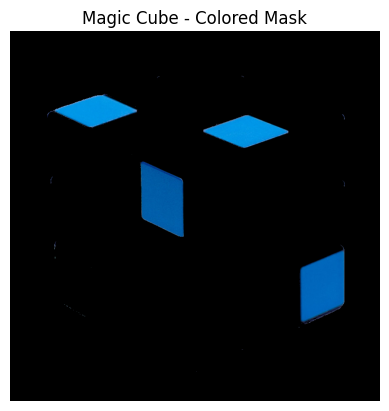

In [103]:
colored_image = cv2.bitwise_and(image, image, mask=mask_image)

plt.imshow(colored_image)
plt.title(f'{title} - Colored Mask')
plt.axis('off')
plt.show()

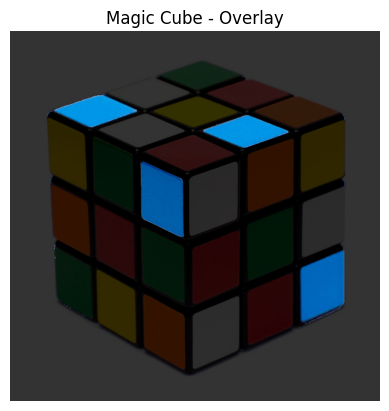

In [104]:
overlay_image = cv2.addWeighted(colored_image, 0.8, image, 0.2, 0)

plt.imshow(overlay_image)
plt.title(f'{title} - Overlay')
plt.axis('off')
plt.show()

## Example 02 - Two Colors:

In [107]:
colors = np.array([
    [[90, 80, 40], [120, 255, 255]],
    [[20, 80, 40], [38, 255, 255]]
], dtype='uint8')

print(colors)

[[[ 90  80  40]
  [120 255 255]]

 [[ 20  80  40]
  [ 38 255 255]]]


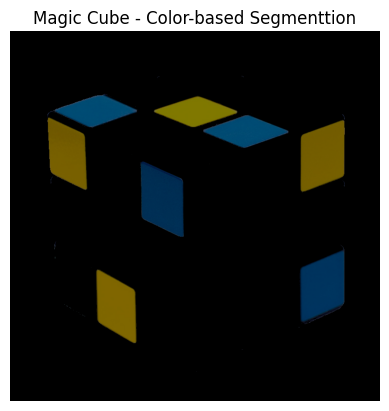

In [108]:
colored_images = []

for color in colors:
    min = color[0]
    max = color[1]

    mask_image = cv2.inRange(image_hsv, min, max)
    colored_image = cv2.bitwise_and(image, image, mask=mask_image)
    colored_images.append(colored_image)


color_segmentation = cv2.addWeighted(colored_images[0], 0.5, colored_images[1], 0.5, 0)
plt.imshow(color_segmentation, cmap='gray')
plt.title(f'{title} - Color-based Segmenttion')
plt.axis('off')
plt.show()

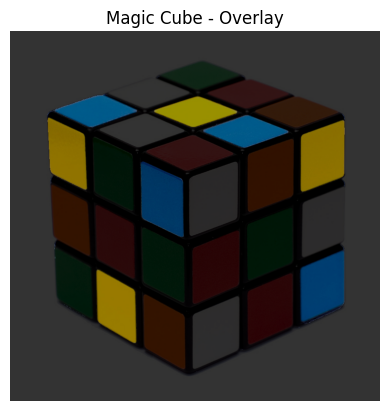

In [109]:
overlay_image = cv2.addWeighted(color_segmentation, 0.8, image, 0.2, 0)

plt.imshow(overlay_image)
plt.title(f'{title} - Overlay')
plt.axis('off')
plt.show()